<a href="https://colab.research.google.com/github/paralkardhananjay/Netflix-Movie-and-Tv-Clustering/blob/main/Netflix_Movie_and_TV_clustering_%7CD_Paralkar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  - Dhananjay Paralkar



# **Project Summary -**

The dataset is collected from Flixable which is a third-party Netflix search engine.This dataset consists of tv shows and movies available on Netflix as of 2019.
Netflix is a global streaming service with over 200 million subscribers. The company has a vast library of movies and TV shows, and it can be difficult for users to find content that they will enjoy. One way to improve the user experience is to cluster movies and TV shows into groups based on their similarity. This will allow users to easily find content that is similar to what they have already watched or rated.

This project will use machine learning to cluster movies and TV shows on Netflix. The first step will be to collect data on all of the movies and TV shows on Netflix. This data will include the title, genre, cast, crew, release date, and rating. Once the data has been collected, it will be preprocessed to remove any errors or inconsistencies.

The next step will be to use machine learning to cluster the movies and TV shows. There are many different clustering algorithms that can be used, but the most appropriate algorithm will depend on the specific data set. In this case, a hierarchical clustering algorithm will be used. Hierarchical clustering algorithms start by creating a cluster for each data point. Then, the algorithm iteratively merges the clusters that are most similar to each other. This process continues until there is only one cluster left.

Once the movies and TV shows have been clustered, the results will be analyzed. This will involve examining the size and composition of each cluster. It will also involve looking at the similarities between the movies and TV shows in each cluster.

The results of this project will be used to improve the user experience on Netflix. The clusters will be used to create recommendations for users. This will allow users to easily find content that they will enjoy.

# **GitHub Link -**

https://github.com/paralkardhananjay/Netflix-Movie-and-Tv-Clustering

# **Problem Statement**


**The information includes TV Shows and films available on Netflix in 2019, according to Flixable,
An analysis published in 2018 highlighted an interesting trend: the number of TV series on Netflix has doubled since 2010, but the number of films decreased by over 2,000 titles over the same time period. This knowledge gives an intriguing chance to examine deeper into the dataset and discover new insights.
By digging further into the statistics, you may learn about the distribution of genres, languages, and release years, as well as the link between ratings and viewership. This study might reveal popular genres, highlight trends in viewer preferences, and give information on the effect of social media.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio
from datetime import datetime


from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
netflix_movie=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
netflix_movie

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [6]:
# Print first  values
netflix_movie.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [7]:
# Print last 5 values
netflix_movie.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
netflix_movie.index

RangeIndex(start=0, stop=7787, step=1)

In [9]:
# Column of dataset
netflix_movie.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# count of Element
netflix_movie.shape

(7787, 12)

### Dataset Information


Attribute Information

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

In [11]:
# Dataset Info
netflix_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
netflix_movie.duplicated().sum().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
netflix_movie.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
# Count of null values
netflix_movie.isnull().sum().sum()

3631

In [15]:
# Visualizing the missing values
netflix_movie['cast'].fillna(value='No cast',inplace=True)
netflix_movie['country'].fillna(value=netflix_movie['country'].mode()[0],inplace=True)

In [16]:
# missing values/Data
netflix_movie.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast               0
country            0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
netflix_movie.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
# Dataset Describe
netflix_movie.describe(include='all')

show_id   type title                director     cast        country  \
count     7787   7787  7787                    5398     7787           7787   
unique    7787      2  7787                    4049     6832            681   
top         s1  Movie    3%  Raúl Campos, Jan Suter  No cast  United States   
freq         1   5377     1                      18      718           3062   
mean       NaN    NaN   NaN                     NaN      NaN            NaN   
std        NaN    NaN   NaN                     NaN      NaN            NaN   
min        NaN    NaN   NaN                     NaN      NaN            NaN   
25%        NaN    NaN   NaN                     NaN      NaN            NaN   
50%        NaN    NaN   NaN                     NaN      NaN            NaN   
75%        NaN    NaN   NaN                     NaN      NaN            NaN   
max        NaN    NaN   NaN                     NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
unique_value=netflix_movie.apply(lambda col: col.unique())
unique_value

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.
# Convert the date_added into date time
netflix_movie['date_added']=pd.to_datetime(netflix_movie['date_added'])
# Compute date
netflix_movie['date_aaded']=netflix_movie['date_added'].dt.day
# Compute year
netflix_movie['year_aaded']=netflix_movie['date_added'].dt.year
# Compute month
netflix_movie['month_added']=netflix_movie['date_added'].dt.month

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [21]:
labels = ['TV Show', 'Movie']
values = [netflix_movie.type.value_counts()[1], netflix_movie.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

##### 1. Why did you pick the specific chart?

Pie charts are indeed effective in visually representing the distribution of categorical data. By using a pie chart to represent the types of content watched on Netflix, with categories such as "TV Show" and "Movie," you can easily communicate the proportions and relative sizes of each category.

##### 2. What is/are the insight(s) found from the chart?

Movies constitute the majority, accounting for 69.1% of the content watched on Netflix, while TV shoes make up a smaller percentage of 30.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data shows a clear preference for TV shows (69.1%) over movies (30.9%) on Netflix, suggesting a preference for shorter formats. TV shows provide ongoing engagement and flexibility, while movies require a dedicated time commitment.

#### Chart - 2

In [23]:
# Chart - 2 visualization code
netflix_movie['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7787, dtype: object

In [24]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_movie['target_ages'] = netflix_movie['rating'].replace(ratings)


In [25]:
tv_shows=netflix_movie[netflix_movie['type']=='TV Show']
movies=netflix_movie[netflix_movie['type']=='Movie']

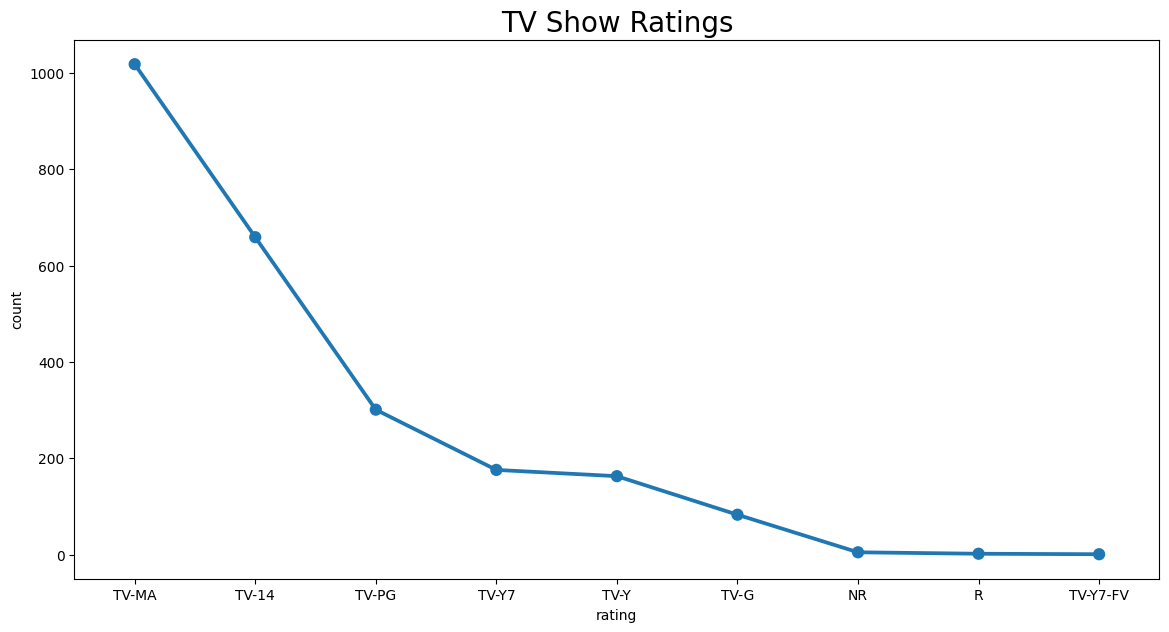

In [26]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

Line Chart is effective for visualizing trends and changes over time. By plotting the number of movies and TV shows released each year

##### 2. What is/are the insight(s) found from the chart?

Tv shows on netflix the TV-MA having highest number of rating.Tv-MA stands for TV Mature Audience indicating that the content is intend for adultaudience due to its mature theme

#### Chart - 3

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

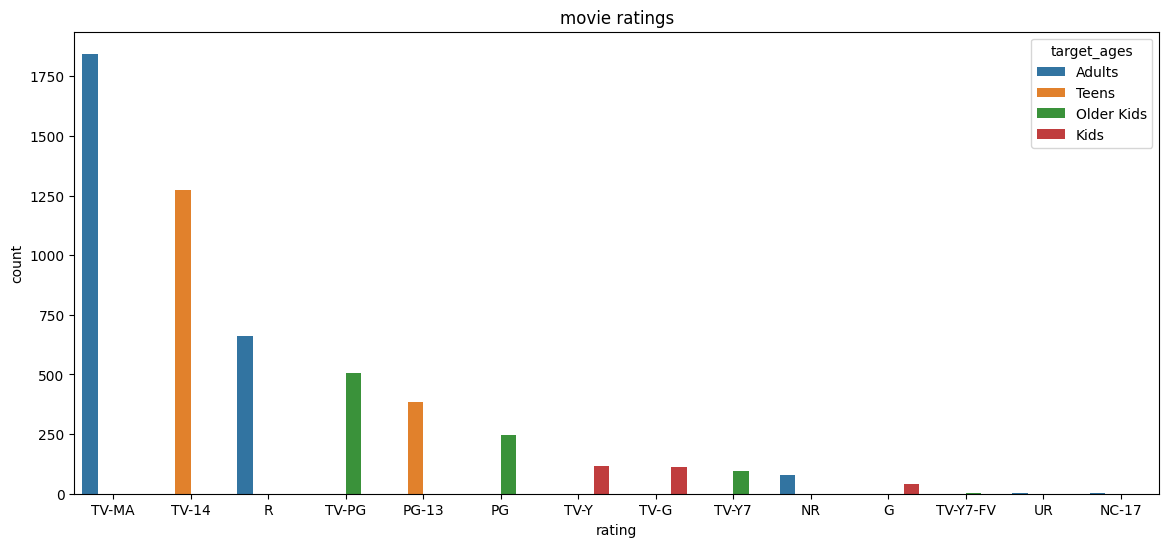

In [27]:
# Chart - 3 visualization code
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)


##### 2. What is/are the insight(s) found from the chart?

In TV and movie rating the TV-MA have highest rating, This shows the most of content is targeted to the adult.TV-Ma is assocoiated with mature thing, strong language and explit content, making suitable for who are 17 year or older

#### Chart - 4

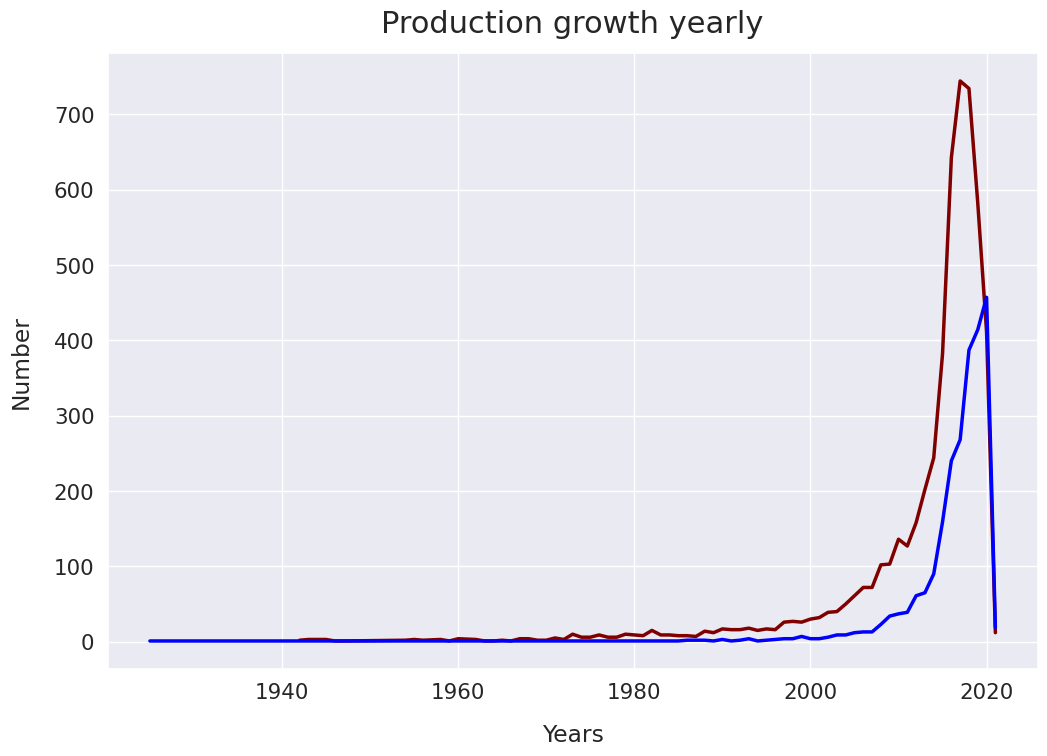

In [28]:
# Chart - 4 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production growth yearly", y=1.02, fontsize=22);



##### 1. Why did you pick the specific chart?

Line charts are effective in visualizing trends and changes over time, making them suitable for analyzing production growth yearly

##### 2. What is/are the insight(s) found from the chart?

1. The line plot shows the yearly production growth of movies and TV shows, with the number of releases for each category represented by separate lines.
2. From 2004 The number of movies growth is increased
3. In 2017-18 maximum number of movies released

#### Chart - 5

<Axes: xlabel='count', ylabel='release_year'>

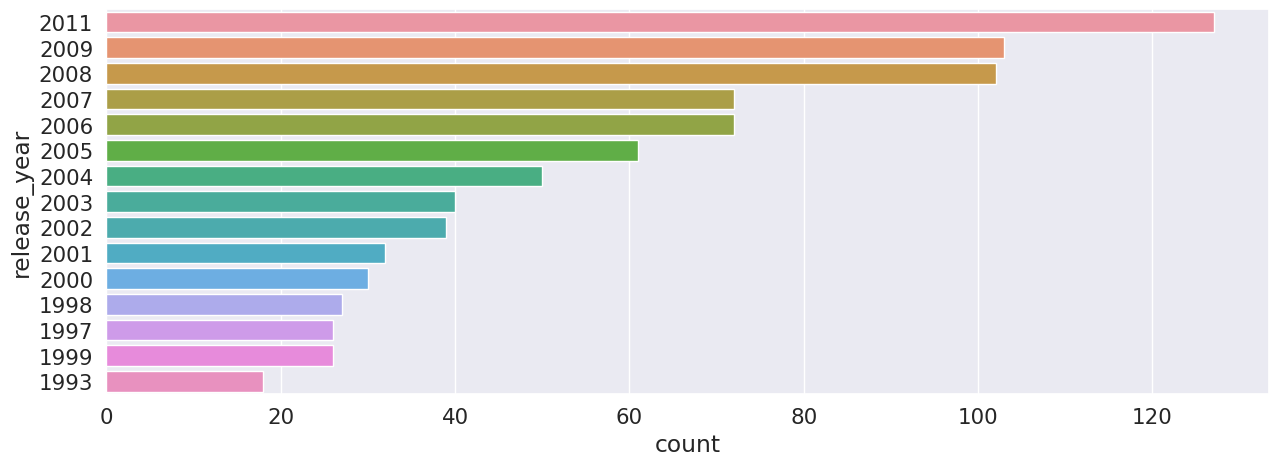

In [29]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=netflix_movie,order=movies['release_year'].value_counts().index[10:25])



##### 1. Why did you pick the specific chart?

The specific chart used in the code is a horizontal bar chart (countplot) to visualize the number of movies released per year in the last 20 years on Netflix. This chart allows for a clear comparison of movie releases across different years.

##### 2. What is/are the insight(s) found from the chart?

In 2011 There are 133 Movie released

#### Chart - 6

<Axes: xlabel='month_added', ylabel='count'>

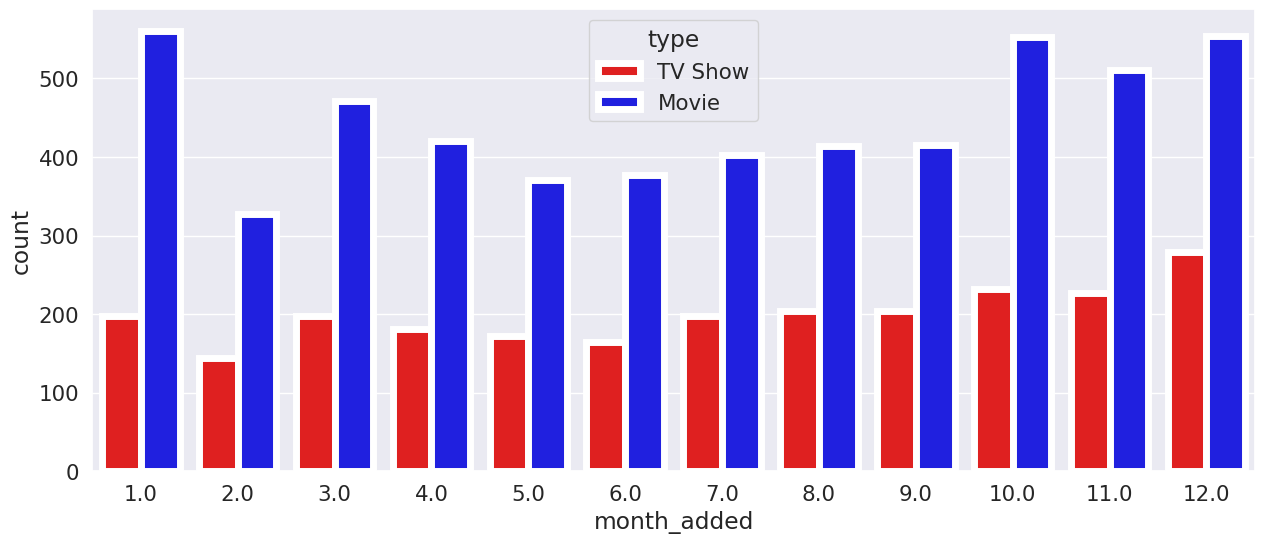

In [30]:
# Plotting the Countplot  Month wise tv show
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_movie, ax=ax,palette=['#FF0000' ,'#0000FF'])

##### 1. Why did you pick the specific chart?

Bar chart It was chosen to visualize the distribution of movies and TV shows added to Netflix over different months

##### 2. What is/are the insight(s) found from the chart?

In Januavry hightest movies get released

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying months with higher content additions can help allocate resources and marketing efforts accordingly.

#### Chart - 7

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

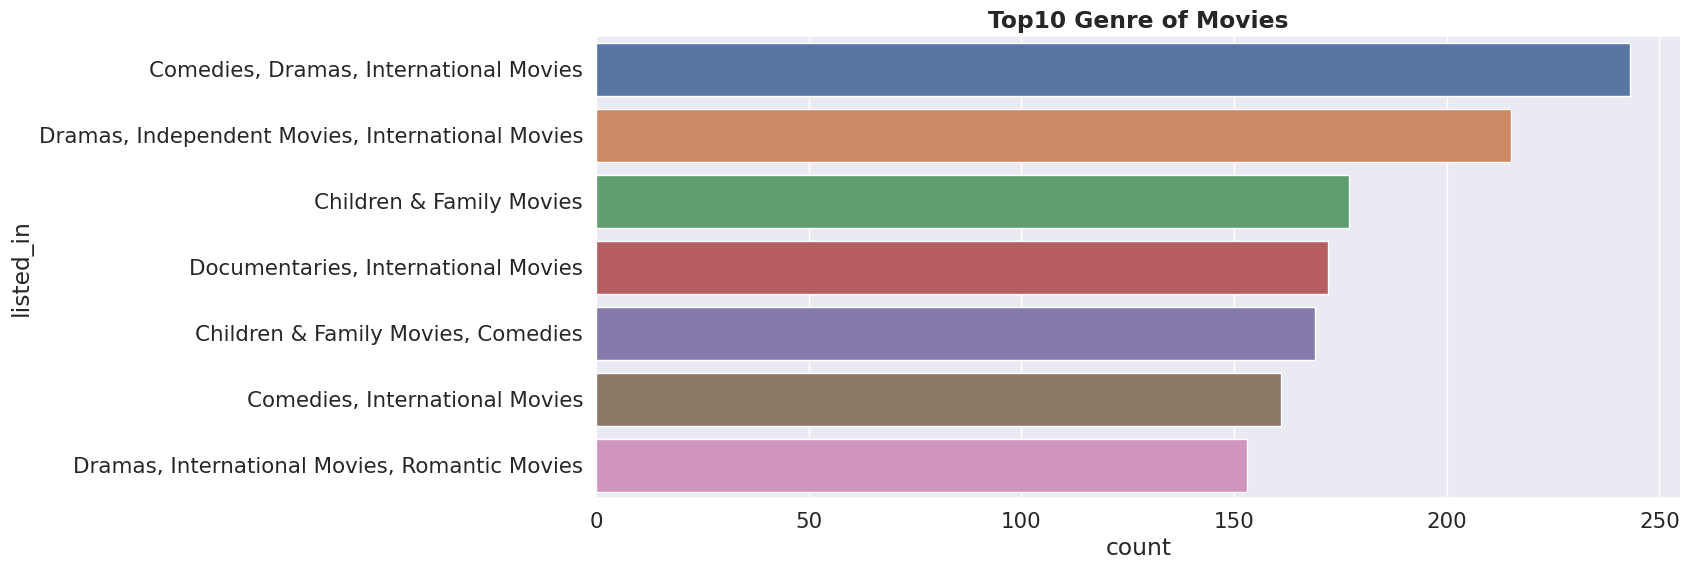

In [31]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[3:10])

##### 1. Why did you pick the specific chart?

 horizontal bar chart to represent the top 10 genres of movies on Netflix. This type of chart is effective in comparing the frequency or count of different categories, in this case, movie genres.

##### 2. What is/are the insight(s) found from the chart?

Amoung all genres comedy drama will be on top

#### Chart - 8

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

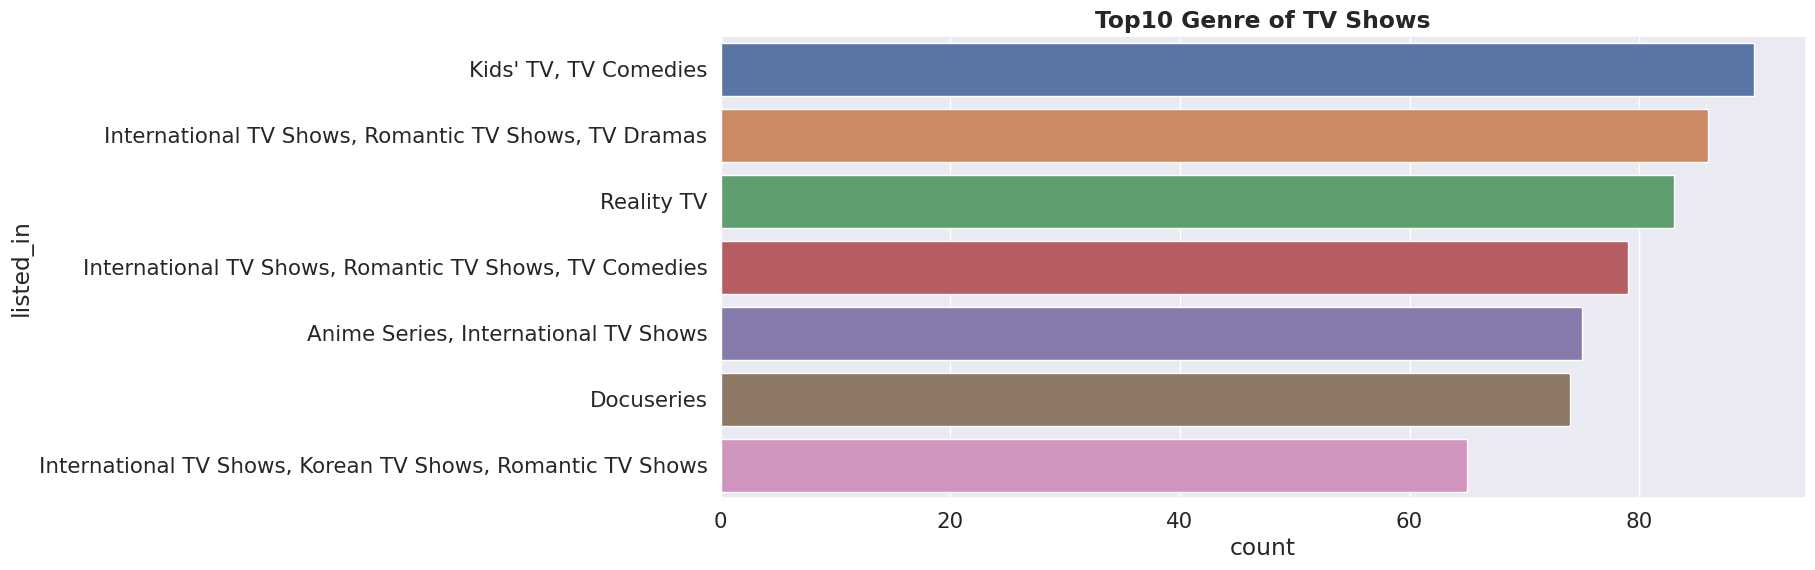

In [32]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[3:10])

#### Chart - 9

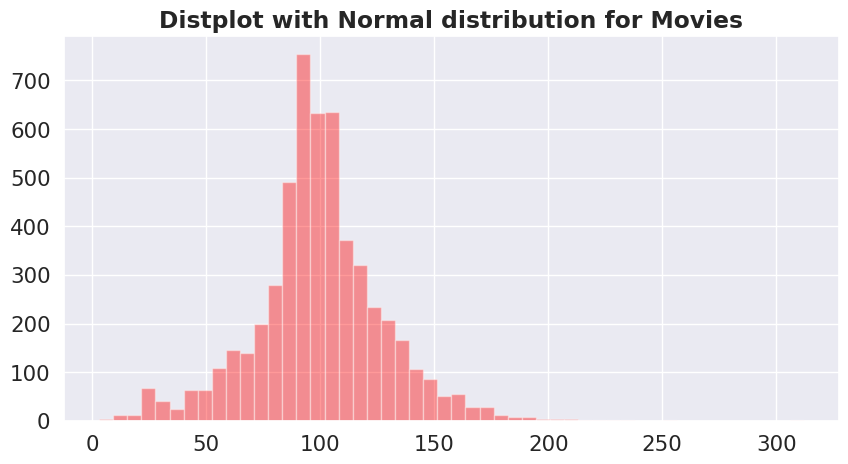

In [33]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,5))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

##### 2. What is/are the insight(s) found from the chart?

The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Netflix offers different lengths of movies and TV shows to fit people's
2. schedules and preferences.
3. This increases engagement and viewing time.
4. It also expands the content library and caters to various genres.

#### Chart - 10

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

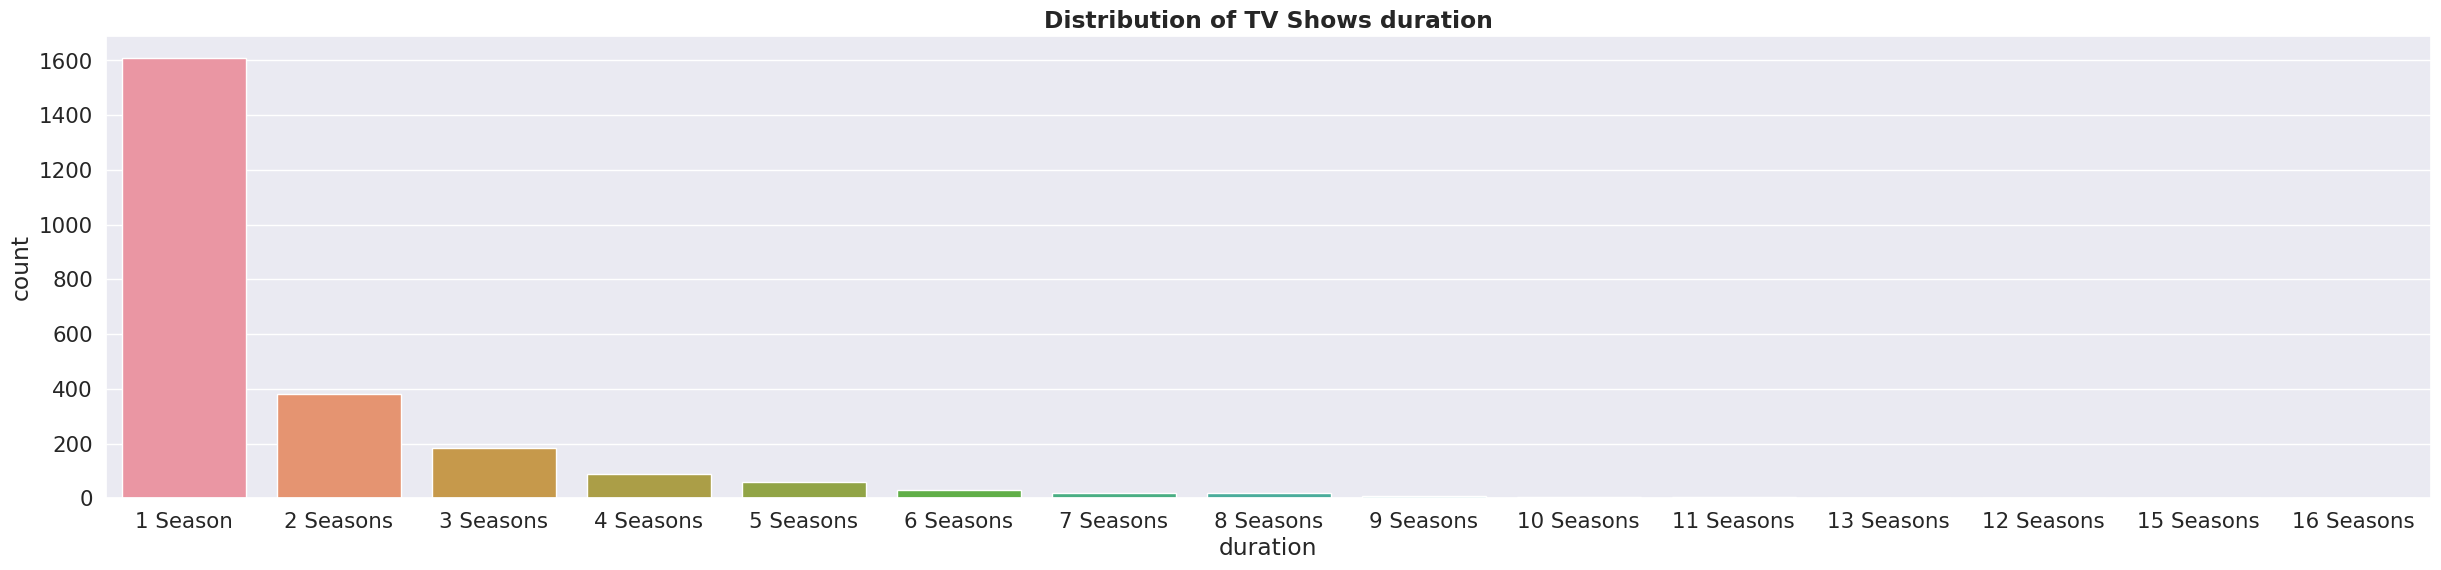

In [34]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

The chart is a countplot, a type of bar chart that shows the number of times each category appears in a dataset. It shows the distribution of TV show seasons

##### 2. What is/are the insight(s) found from the chart?

 Most of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes,Limited TV show seasons can help producers optimize their production planning, reduce costs, and potentially increase the output of content.

#### Chart - 11

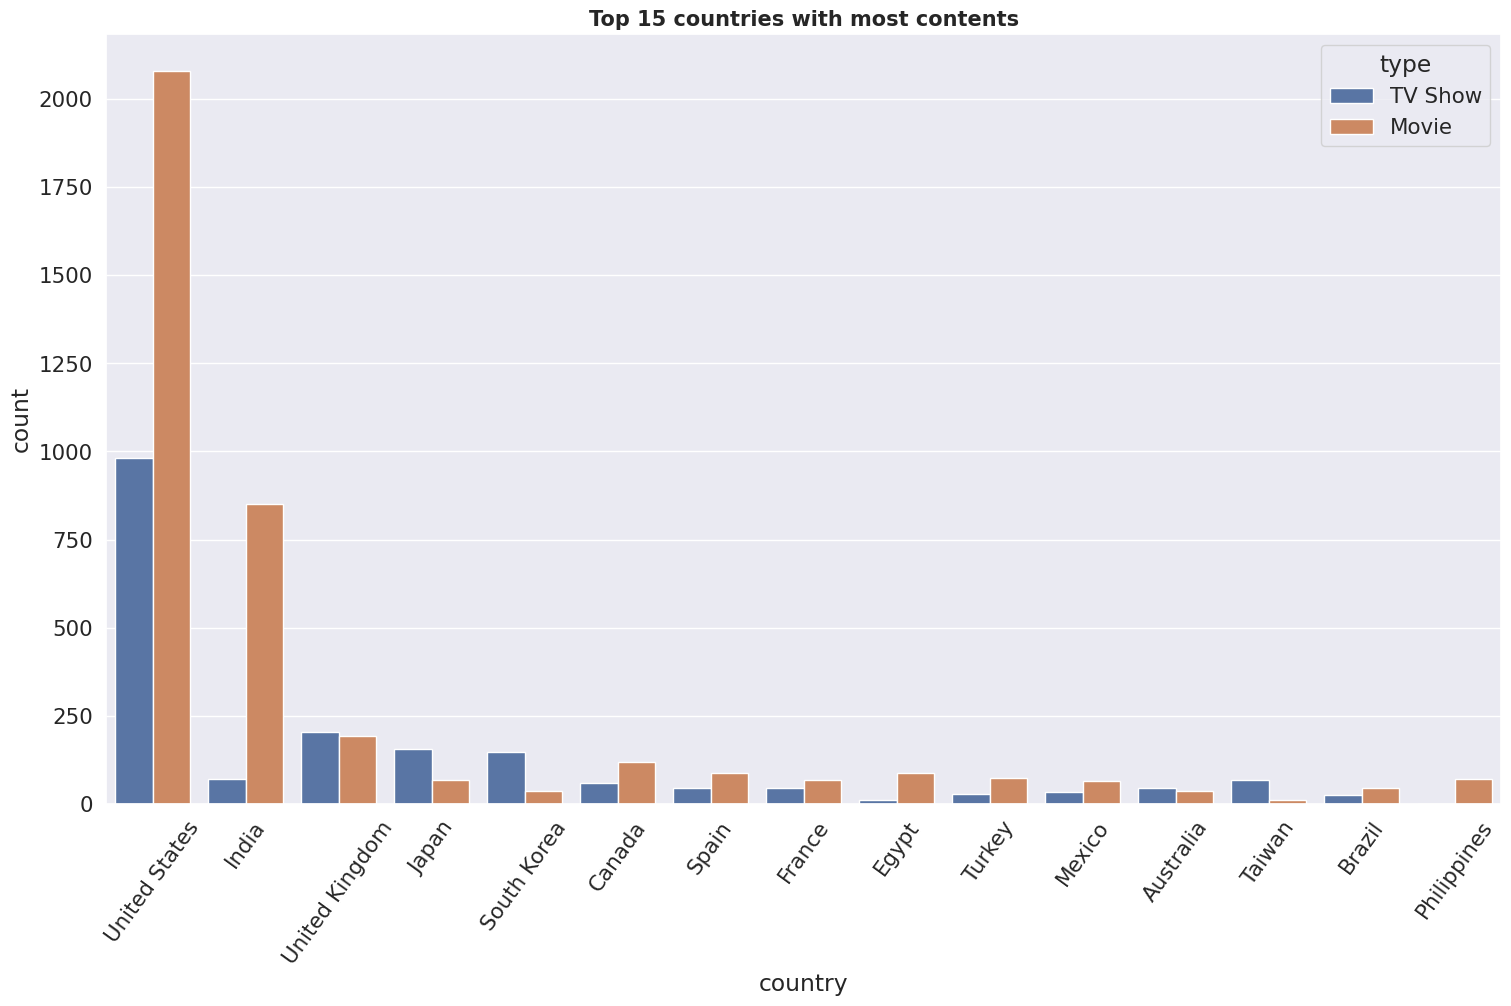

In [35]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,10))
sns.countplot(x=netflix_movie['country'],order=netflix_movie['country'].value_counts().index[0:15],hue=netflix_movie['type'])
plt.xticks(rotation=54)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We pick the bar chart to display the most content came from which country

##### 2. What is/are the insight(s) found from the chart?

Most of the netflix content came from United States

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are no insights from the chart that would lead to negative growth. However, it is important to note that the chart only shows the top 15 countries with the most content on Netflix. There are many other countries that do not have as much content available, and this could lead to negative growth in those markets.

#### Chart - 12

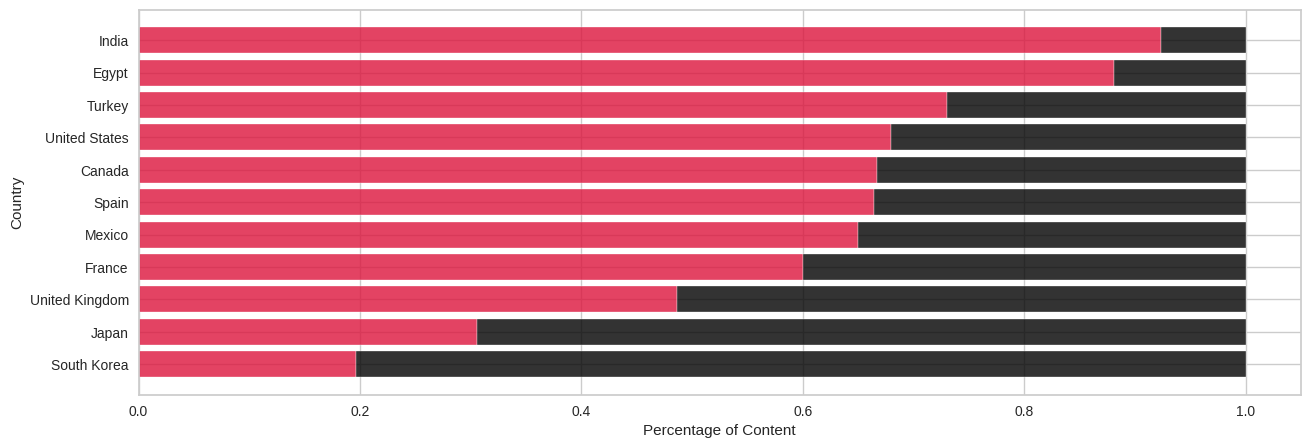

In [82]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
# country_order = netflix_movie['country'].value_counts()[:11].index
# content_data = netflix_movie[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
# content_data['sum'] = content_data.sum(axis=1)
# ax.set_xlabel('Percentage of Content')
# ax.set_ylabel('Country')

# content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# # Plotting the barh
# fig, ax = plt.subplots(1,1,figsize=(15, 5),)

# ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
#         color='crimson', alpha=0.8, label='Movie')
# ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
#         color='black', alpha=0.8, label='TV Show')


import pandas as pd
import matplotlib.pyplot as plt

# Load the data

# Get the top 11 countries
country_order = netflix_movie['country'].value_counts()[:11].index

# Group the data by country and type
content_data = netflix_movie[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]

# Calculate the sum of each column
content_data['sum'] = content_data.sum(axis=1)

# Calculate the ratio of each type to the total
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Plot the bar chart
ax.barh(content_data_ratio.index, content_data_ratio['Movie'], color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], color='black', alpha=0.8, label='TV Show')

# Add the x-axis and y-axis labels
ax.set_xlabel('Percentage of Content')
ax.set_ylabel('Country')

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

 I picked is a horizontal bar chart. This type of chart is useful for comparing values across different categories. In this case, I am comparing the number of movies and TV shows available in different countries.

##### 2. What is/are the insight(s) found from the chart?

india has highest number of movies in netflix
* The United States has the most movies and TV shows available, followed by the United Kingdom, Canada, and India.
* There is a significant difference in the number of movies and TV shows available in different countries. For example, there are over 10 times more movies available in the United States than in India.
* The number of movies and TV shows available in a country is not necessarily correlated with the size of the country. For example, Canada has a smaller population than India, but there are more movies and TV shows available in Canada.



#### Chart - 13 - Correlation Heatmap

In [37]:
# Correlation Heatmap visualization code

# Preparing data for heatmap
netflix_movie['count'] = 1
data = netflix_movie.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


netflix_heatmap = netflix_movie.loc[netflix_movie['country'].isin(data)]
netflix_heatmap = pd.crosstab(netflix_heatmap['country'],netflix_heatmap['target_ages'],normalize = "index").T
netflix_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.471550  
Kids            0.027322  0.022388        0.093199       0.089601  
Older Kids      0.120219  0.044776        0.204030       0.195553  
Teens           0.382514  0.097015        0.188917       0.243296

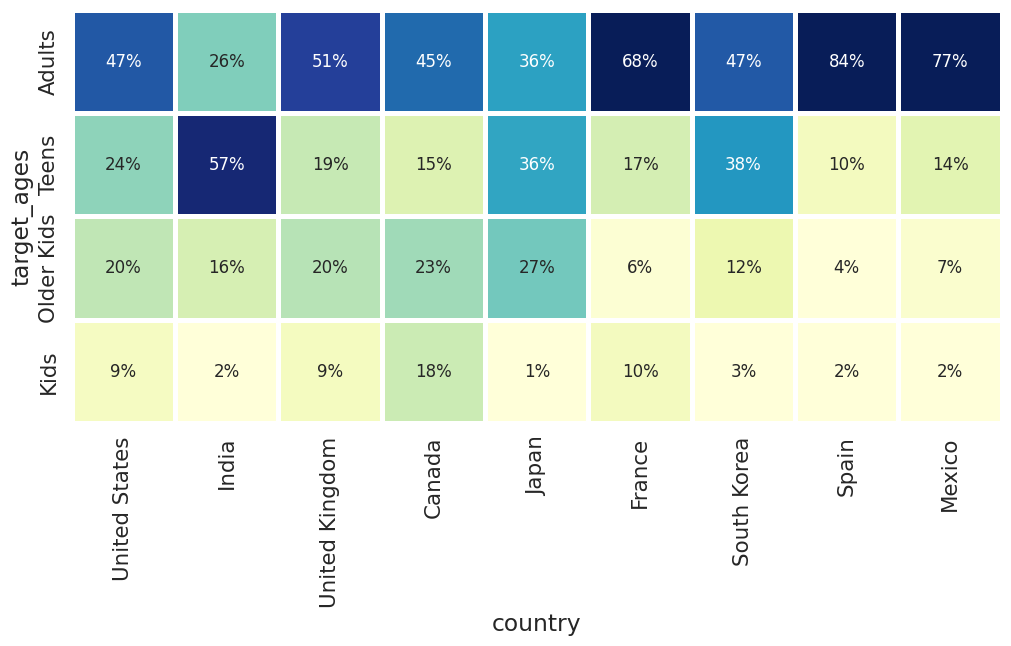

In [38]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(netflix_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

1. Spain has the highest percentage of adults interested in the subject, at 84%.

2. France is the second-highest, with 68% of adults interested.
3. India has the highest percentage of teenagers interested, at 57%.
4. The United Kingdom has a relatively high level of interest among adults, with 51% expressing interest.
5. Mexico also demonstrates a substantial level of interest, with 77% of adults showing interest.
6. South Korea and the United States have a moderate level of engagement, with 47% of adults showing interest in each country.
7. Japan shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.
8. Canada has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define  hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   H1:The duration which is more than 90 mins are movies
*   HO:The duration which is more than 90 mins are NOT movies




In [40]:
netflix_movie

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  date_aaded  \
0     In a future where the elite inhabit an island ...        14.0   
1     After a devastating earthquake hits Mexico Cit...        23.0   
2     When an army recruit is f

In [41]:
#making copy of netflix_clean_frame
netflix_hypothesis=netflix_movie.copy()
#head of netflix_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  date_aaded  year_aaded  \
0  In a future where the elite inhabit an island ...        14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...        23.0      2016.0   
2  When an army recruit is found dead, his fellow...        20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...        16.0      2017.0   
4  A brilliant group of students become card-coun...         1.0      2020.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1  
4          1.0       Teens      1

In [42]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [43]:
#Another category is target_ages (4 classes).
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])
#head of netflix_
netflix_hypothesis.head(3)


show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  date_aaded  year_aaded  \
1  After a devastating earthquake hits Mexico Cit...        23.0      2016.0   
2  When an army recruit is found dead, his fellow...        20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...        16.0      2017.0   

   month_added target_ages  count  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1

In [44]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [45]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))


Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [46]:
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

t-distribution


In [47]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [48]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*Answer* Here.

*   HO:movies rated for kids and older kids are at least two hours long.
*   H1:movies rated for kids and older kids are not at least two hours long.




In [49]:
netflix_movie.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  date_aaded  year_aaded  \
0  In a future where the elite inhabit an island ...        14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...        23.0      2016.0   
2  When an army recruit is found dead, his fellow...        20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...        16.0      2017.0   
4  A brilliant group of students become card-coun...         1.0      2020.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1  
4          1.0       Teens      1

In [50]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [51]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [52]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0      Adults   98.275145
1        Kids   66.486891
2  Older Kids   92.024648
3       Teens  110.025332

In [53]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [54]:
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

In [55]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [56]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [57]:
# Handling Missing Values & Missing Value Imputation
netflix_movie.fillna('',inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The director, cast, country, genre, and description are chosen as the attributes to cluster

In [58]:
# Combining all the clustering attributes into a single column
# Combining all the clustering attributes into a single column
netflix_movie['clustering'] = (netflix_movie['director'] + ' ' + netflix_movie['cast'] +' ' +
                                 netflix_movie['country'] +' ' + netflix_movie['listed_in'] +
                                 ' ' + netflix_movie['description'])
netflix_movie['clustering'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [59]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
      # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [60]:
netflix_movie['Clean_Text'] = netflix_movie['clustering'].apply(transform_text)


In [61]:
netflix_movie["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

#Vectorization:

In [62]:
clustering_data = netflix_movie['clustering']


In [63]:
bag_of_words = netflix_movie.Clean_Text
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [64]:
print(X.shape)

(7787, 20000)


In [65]:
t_vectorizer.get_feature_names_out()


array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)


























### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Principal component analysis, or PCA, is a dimensionality reduction method frequently used in machine learning and data analysis. Its objective is to pinpoint the primary components—or directions—along which the data vary most. Finding these elements enables PCA to compactly represent the data while maintaining its fundamental structure.

In [66]:
# DImensionality Reduction (If needed)
#PCA Code

import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())



PCA()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

A powerful method for removing the most important characteristics from a dataset is PCA. PCA generates a new collection of variables known as principle components by modifying the original characteristics. These elements, which are linear combinations of the original attributes, are made to capture as much variety in the data as possible.

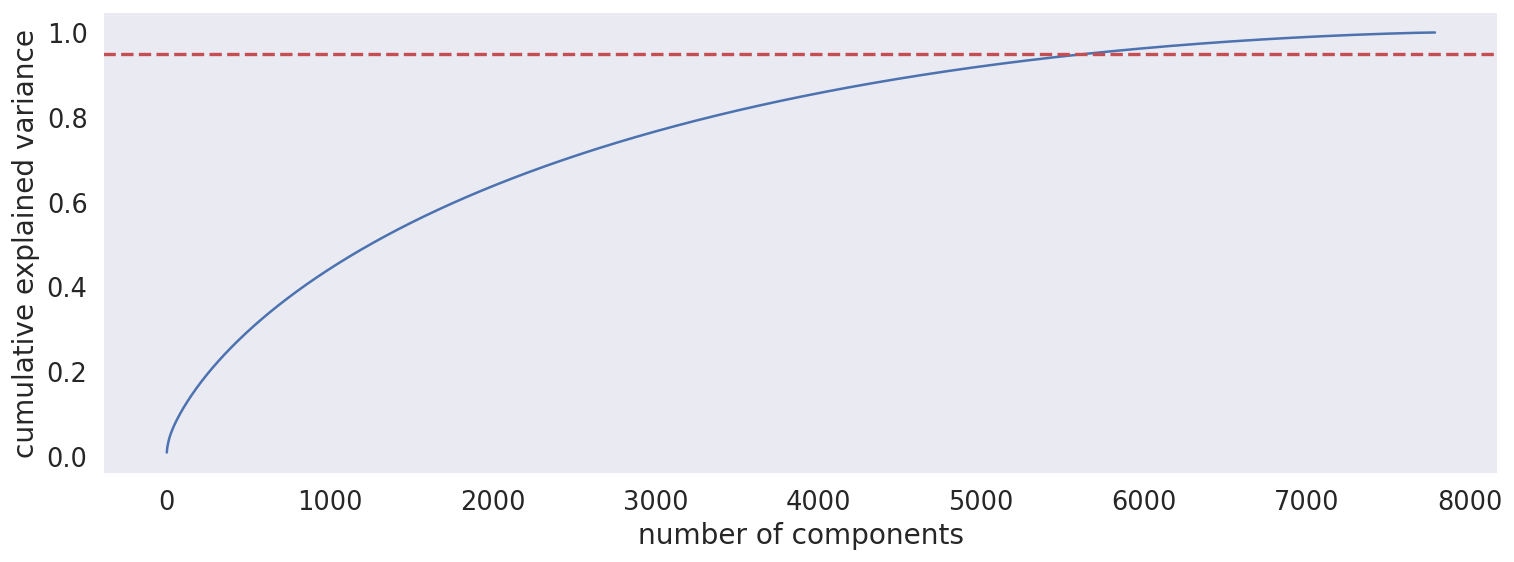

In [67]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

Analysing the plot of cumulative explained variance might help determine the ideal number of components for dimensionality reduction. You can decide on the amount of components to take into account for your study by locating the point where the curve crosses or closely approaches a desirable threshold, such as 95%. This method gives direction for dimensionality reduction and enables you to choose the number of components that efficiently capture the appropriate quantity of information.

In [68]:
# # Import the necessary libraries
from sklearn.decomposition import PCA
# # Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# # Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# # Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# # Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)

(7787, 5653)


In [69]:
X_transformed

array([[ 0.11980329, -0.02267127, -0.0122462 , ..., -0.00730293,
        -0.00697236, -0.00237195],
       [-0.04132775, -0.03107014,  0.02087998, ...,  0.00188454,
         0.01496376, -0.00731461],
       [-0.04110578, -0.04962319, -0.00337514, ..., -0.00691715,
         0.0026895 ,  0.00938257],
       ...,
       [-0.06622165,  0.11541688,  0.17191054, ..., -0.00495482,
         0.01456018, -0.0025139 ],
       [ 0.09595272,  0.00747056, -0.0022959 , ...,  0.00854873,
         0.00294345, -0.005817  ],
       [-0.07624317,  0.27774587,  0.18705256, ..., -0.00898035,
        -0.00039413,  0.00085025]])

## ***7. ML Model Implementation***

### K-Nearest Neighbors Algorithm  ML Model - 1

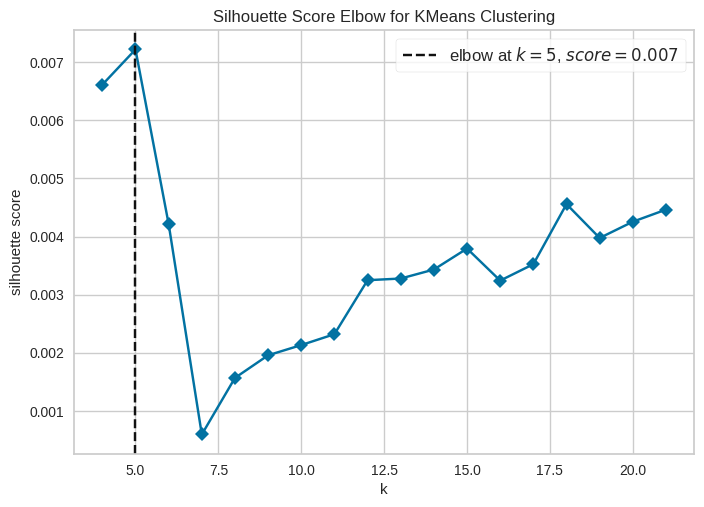

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [70]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.0046214712918749255


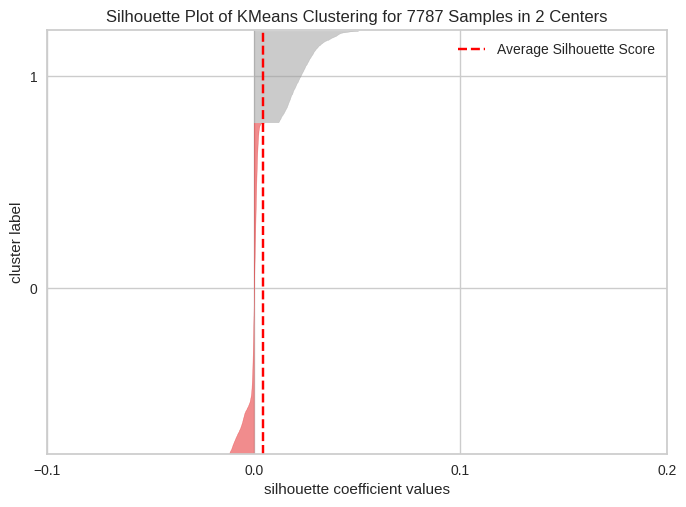

For n_clusters = 3, silhouette score is 0.005646625701933911


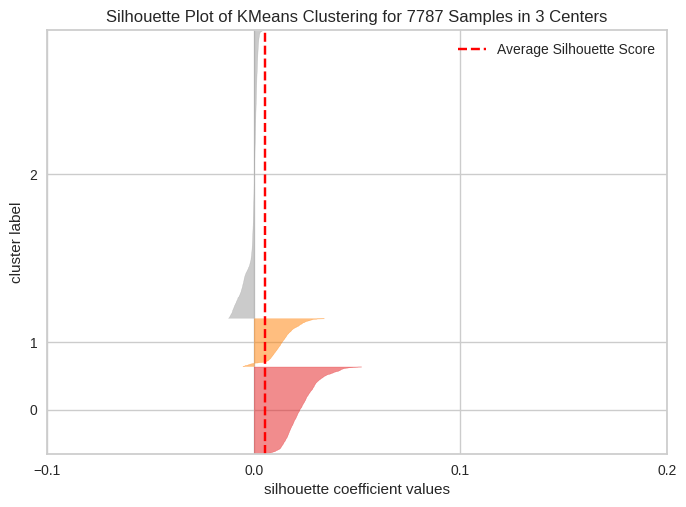

For n_clusters = 4, silhouette score is 0.006613359016102113


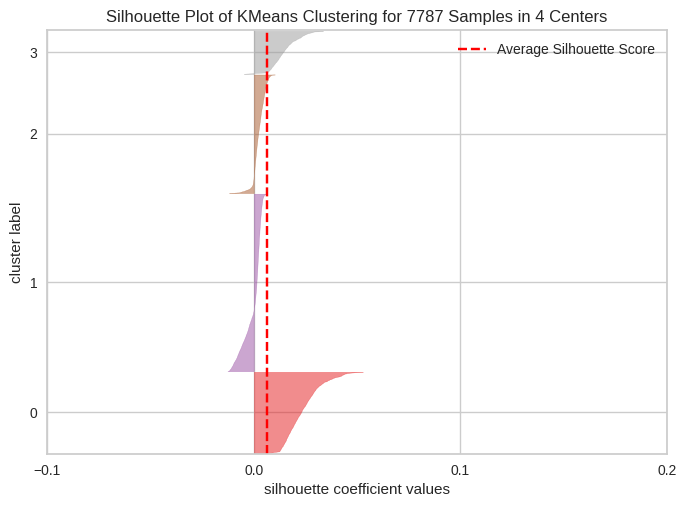

For n_clusters = 5, silhouette score is 0.007219063531029045


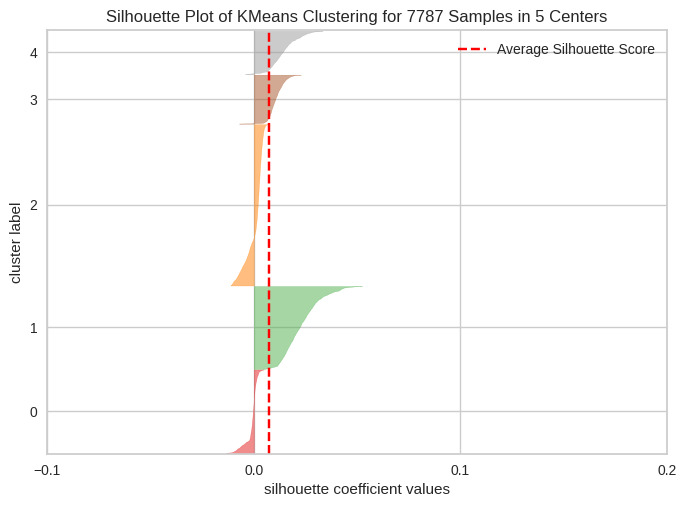

For n_clusters = 6, silhouette score is 0.00421562696026432


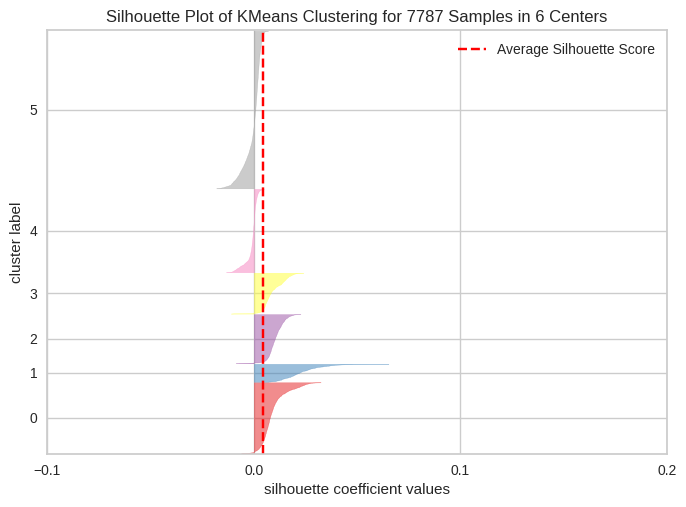

For n_clusters = 7, silhouette score is 0.000595180246123799


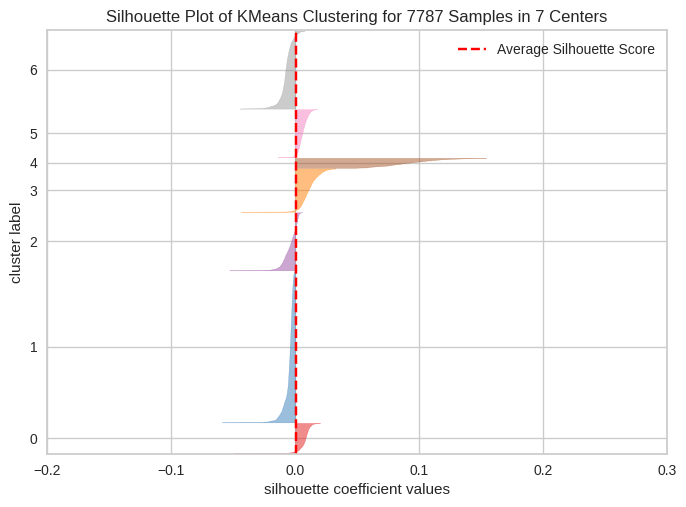

For n_clusters = 8, silhouette score is 0.0015683131187979329


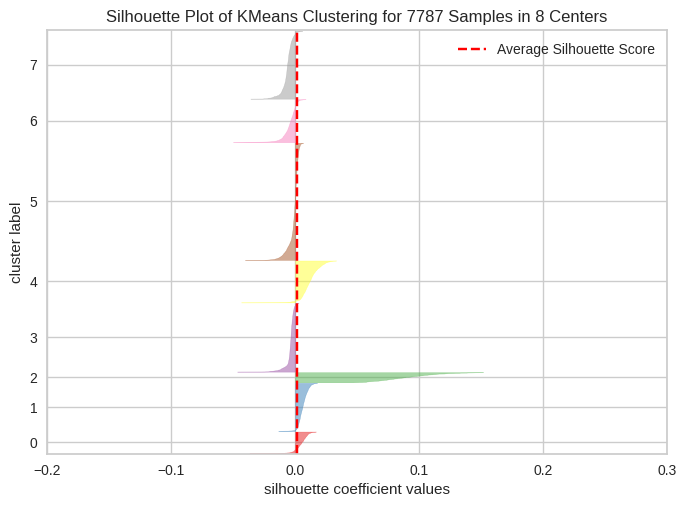

For n_clusters = 9, silhouette score is 0.001957680953506936


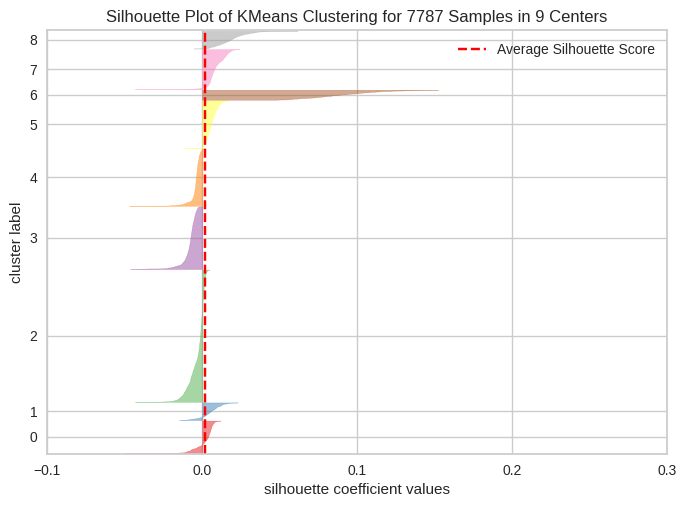

In [72]:
silhouette_score_analysis(10)

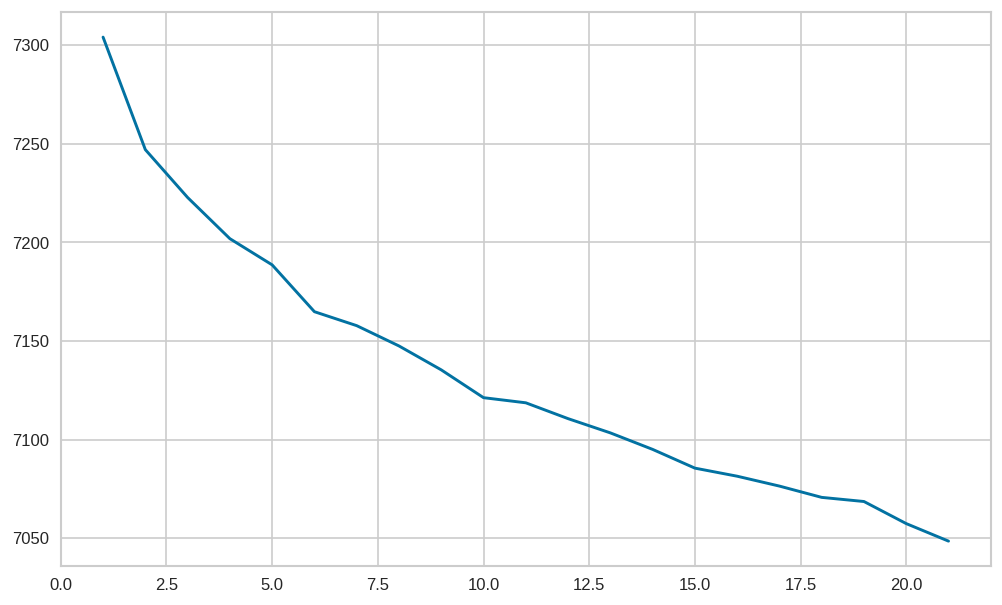

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)




This performs K-means clustering with varying numbers of clusters and plots the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS helps determine the optimal number of clusters for the dataset by identifying the "elbow point" where the WCSS starts to level off.

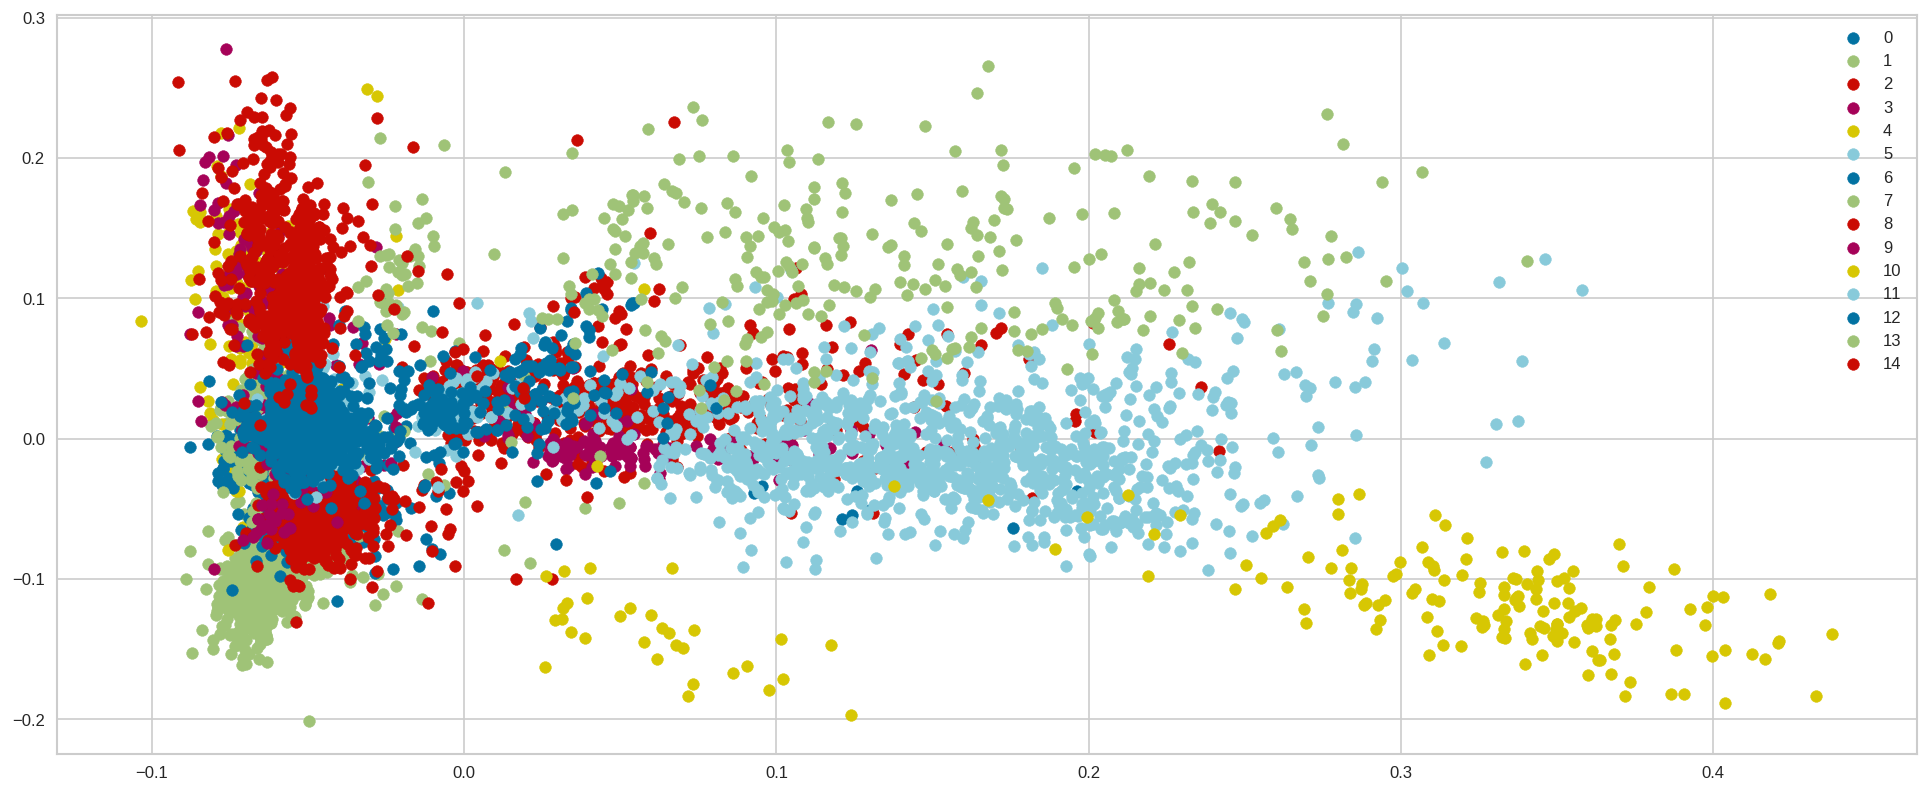

In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()


In [75]:
# Add cluster values to the dateframe.
netflix_movie['cluster_number'] = kmeans.labels_

In [76]:
netflix_movie.head(1)

show_id     type title director  \
0      s1  TV Show    3%            

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description date_aaded year_aaded  \
0  In a future where the elite inhabit an island ...       14.0     2020.0   

  month_added target_ages  count  \
0         8.0      Adults      1   

                                          clustering  \
0   João Miguel, Bianca Comparato, Michel Gomes, ...   

                                          Clean_Text  cluster_number  
0  joão miguel bianca comparato michel gomes rodo...               5

In [77]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = netflix_movie['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)



    clusters  cluster_number
0         12            1299
1          5            1013
2          8            1006
3          1             860
4         14             542
5          2             510
6          7             496
7          6             457
8         11             410
9         13             315
10         9             232
11         3             196
12        10             181
13         4             151
14         0             119


In [78]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_movie[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#00FF00",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()


Exploring Cluster 9
Looking for insights from type Movies/TV Shows


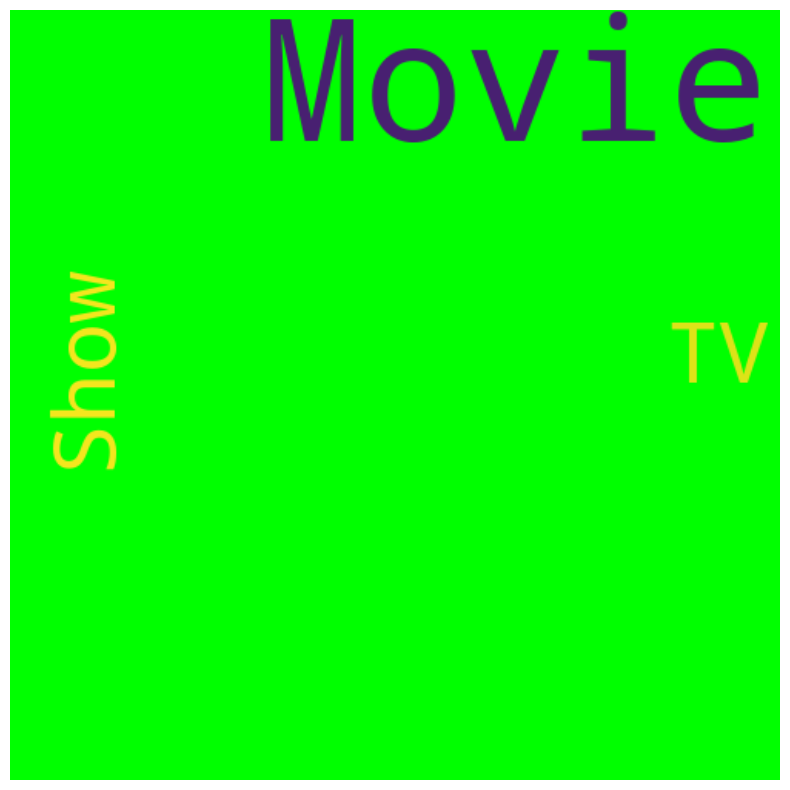

Looking for insights from title Movies/TV Shows


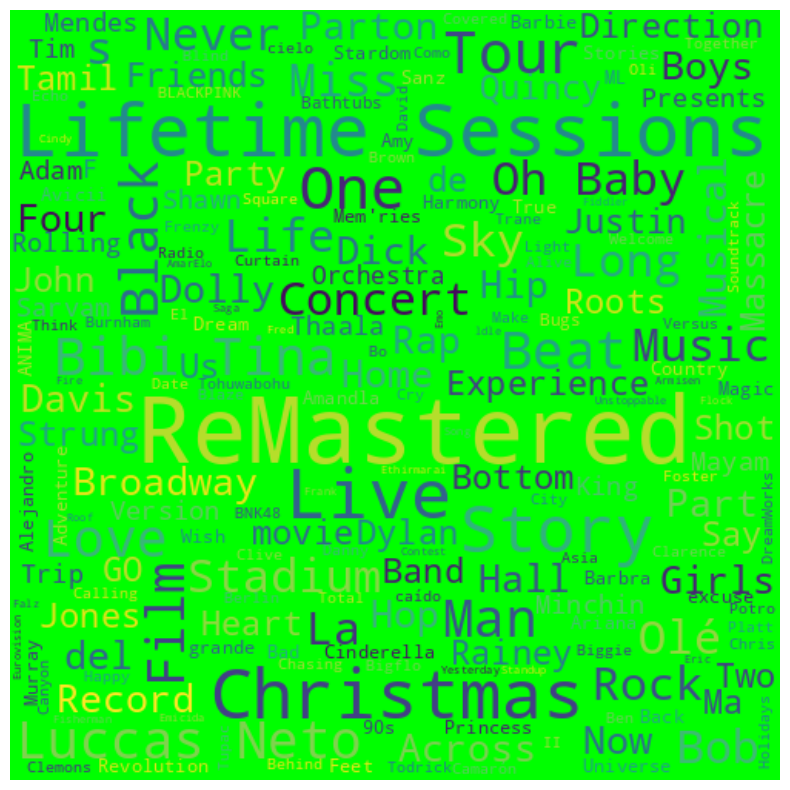

Looking for insights from country Movies/TV Shows


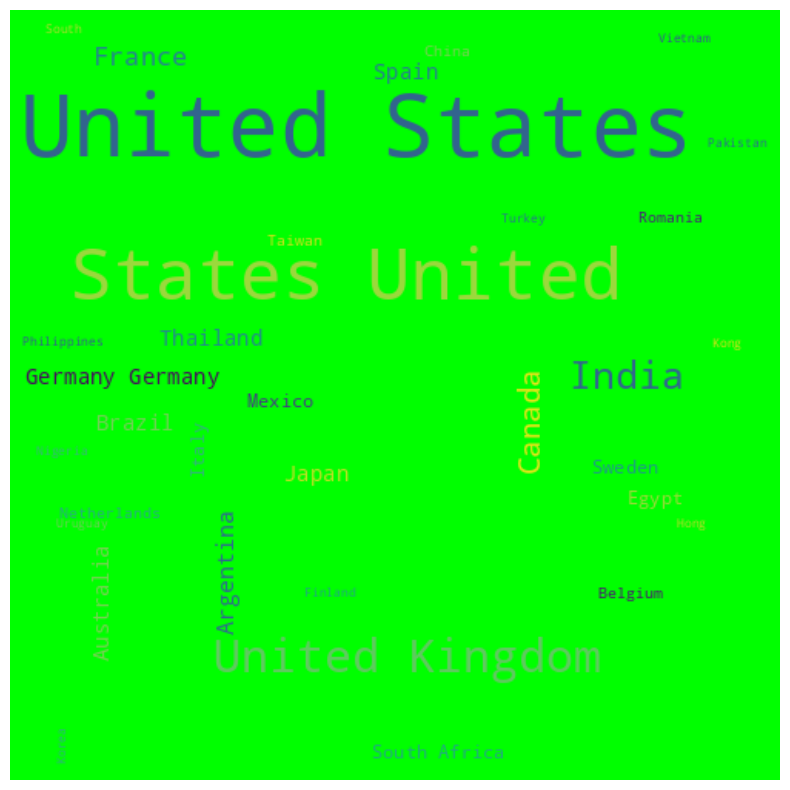

Looking for insights from rating Movies/TV Shows


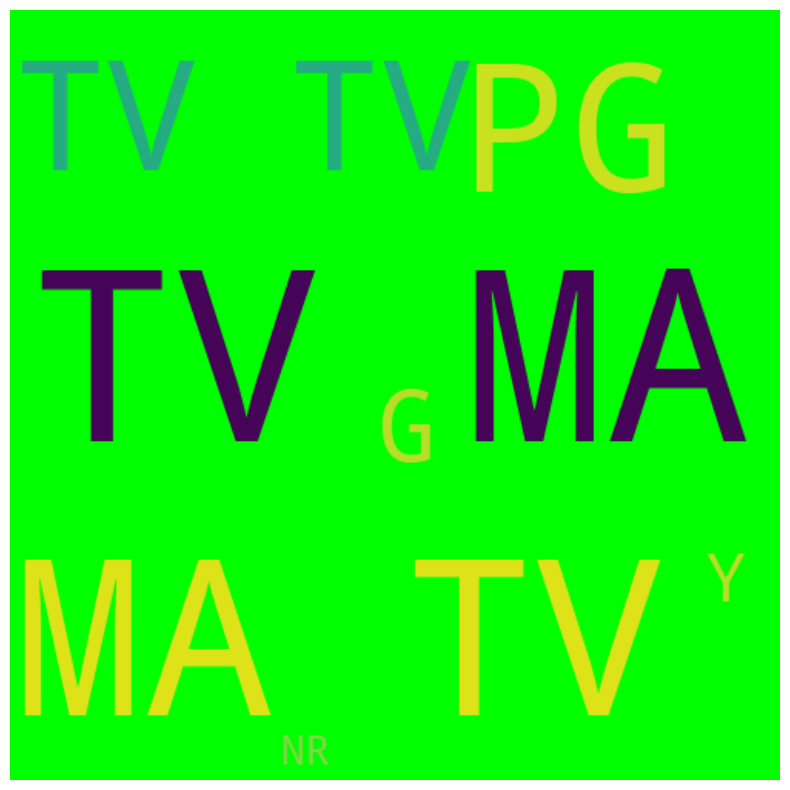

Looking for insights from listed_in Movies/TV Shows


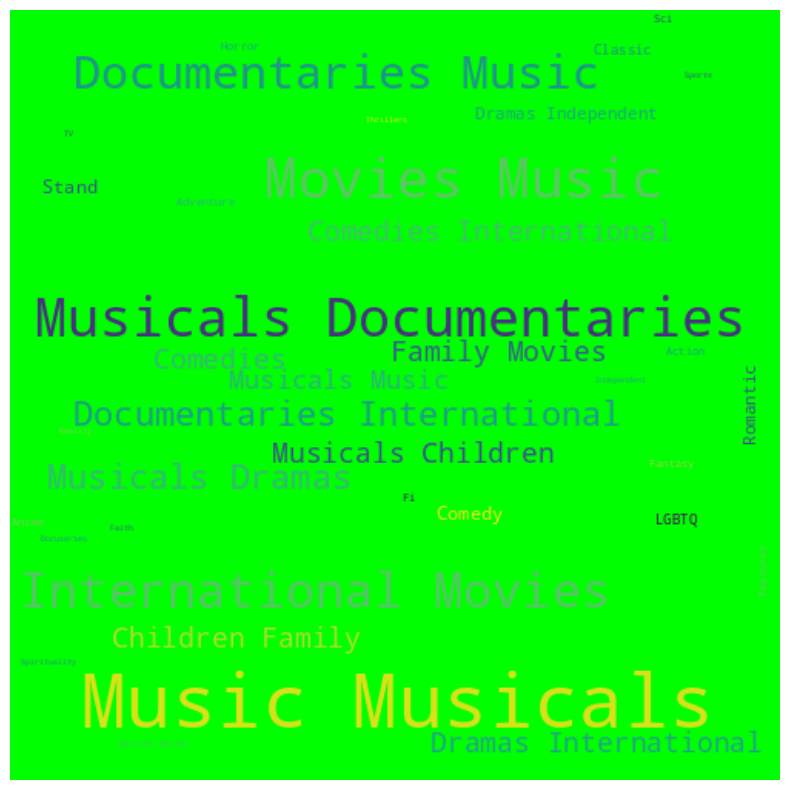

Looking for insights from description Movies/TV Shows


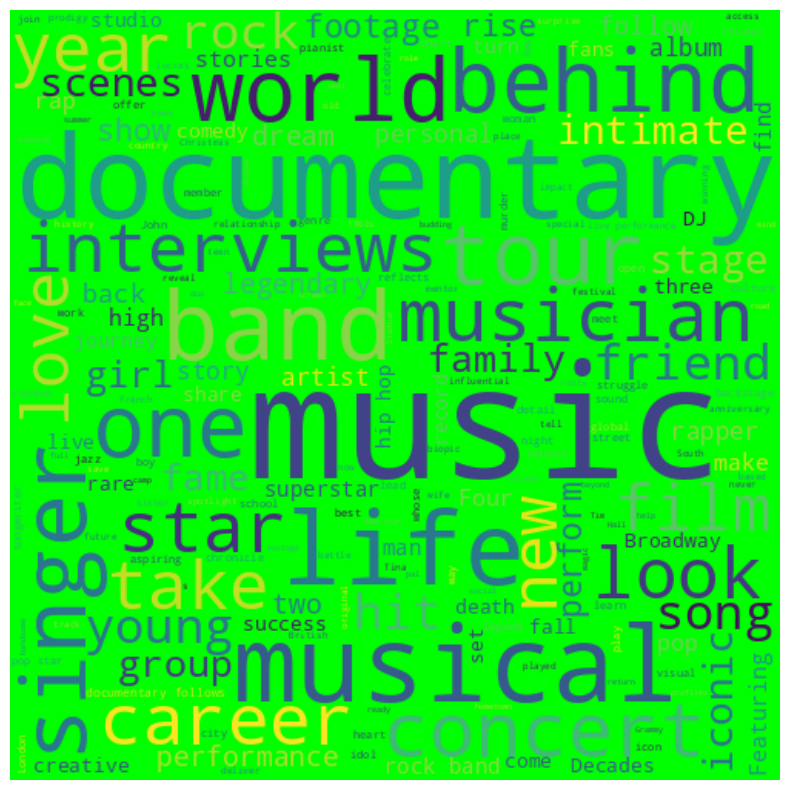

In [79]:
word_count(9)

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


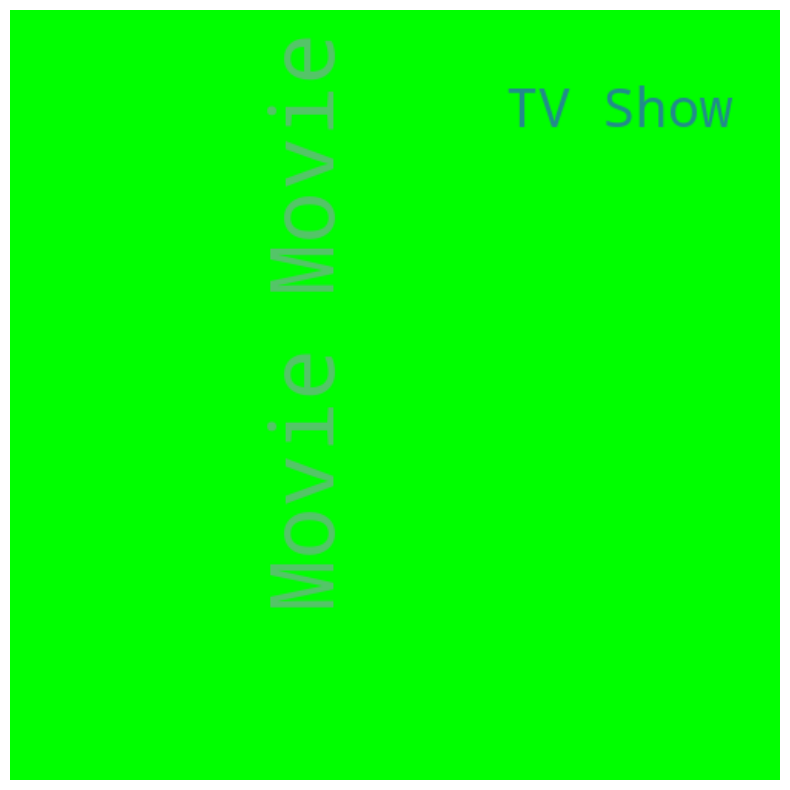

Looking for insights from title Movies/TV Shows


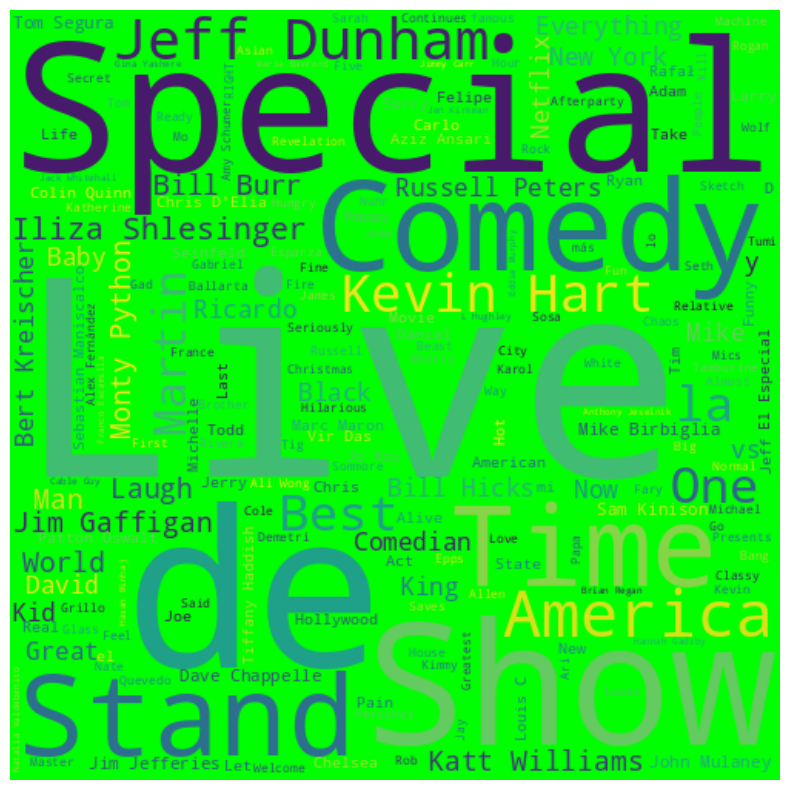

Looking for insights from country Movies/TV Shows


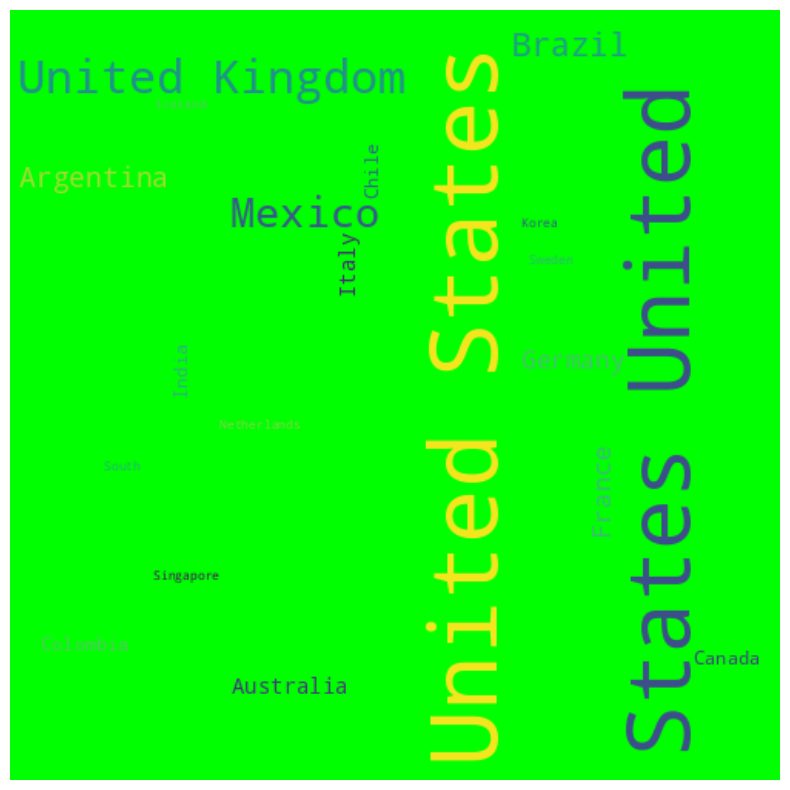

Looking for insights from rating Movies/TV Shows


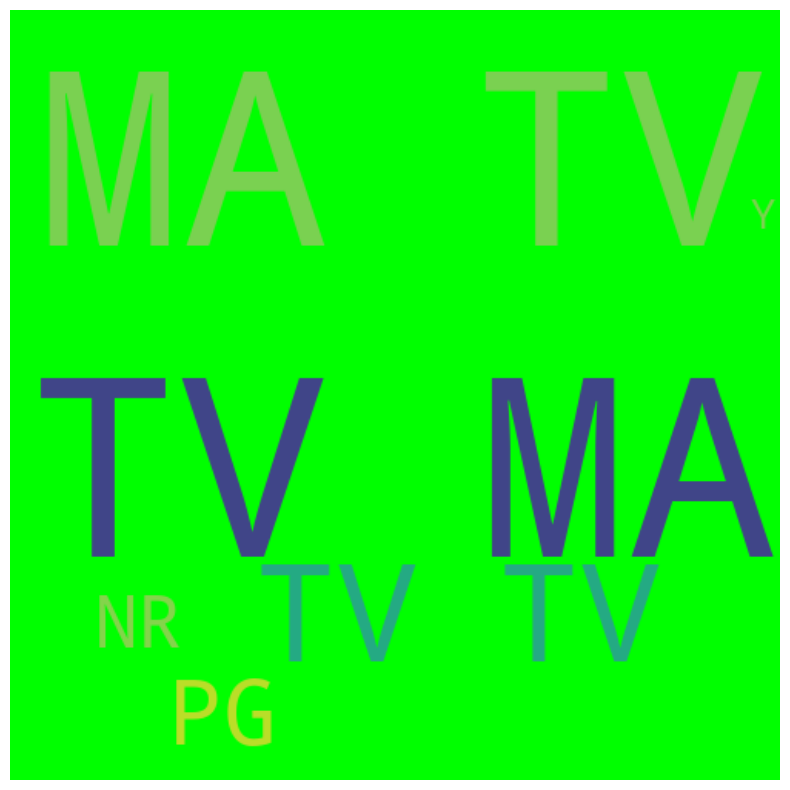

Looking for insights from listed_in Movies/TV Shows


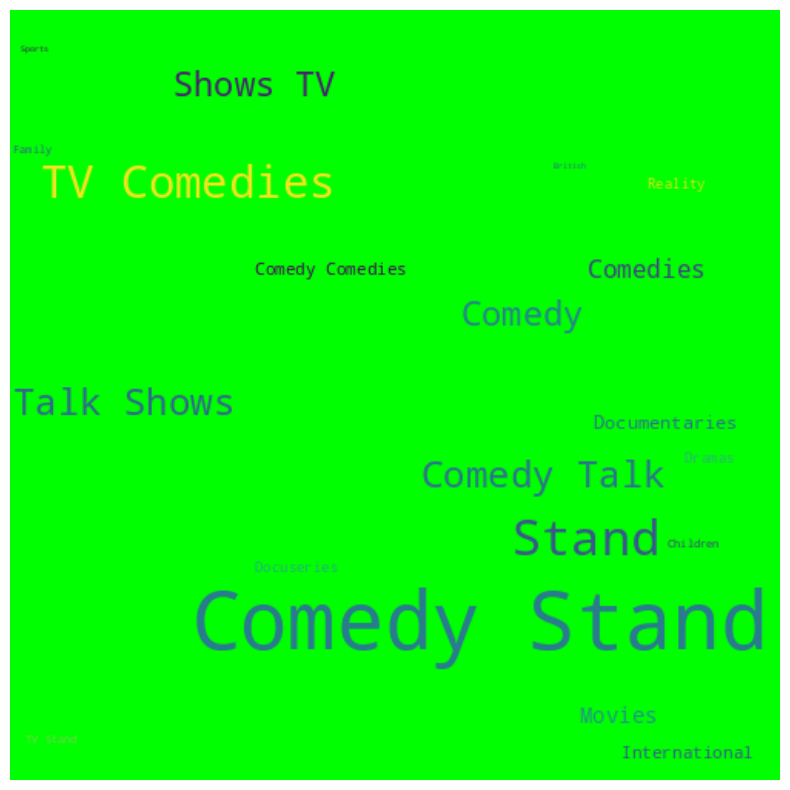

Looking for insights from description Movies/TV Shows


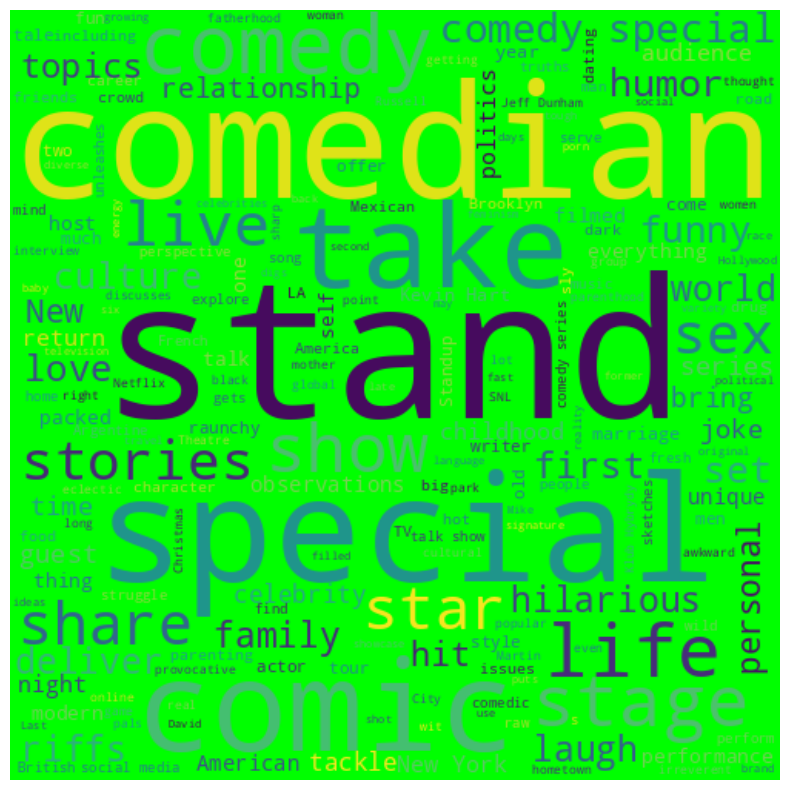

In [80]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

Type - Movie & Tv shows

Title - Special, America,Time,Live,Comedy, Netflix Alive, Martin

Country - United States,Brazil,Mexico,Italy

Rating -TV-MA,TV-PG

Listed_in - Tv-Comedies, Comedy Stand, Talk shows

Description- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Netflix hosts more movies than TV shows on its platform, and the number of shows being added is growing exponentially. The majority of shows are produced in the United States.
2. Data was clustered based on attributes such as director, cast, country, genre, rating, and description.
3. The attributes were tokenized, preprocessed, and transformed into numerical representations using TF-IDF vectorization, resulting in 10,000 attributes.
4. Principal Component Analysis (PCA) was used to handle the curse of dimensionality, reducing the number of components to 3,000 while capturing over 80% of the variance.
5. K-Means Clustering algorithm was employed to create clusters, with the optimal number of clusters determined as 5 using the elbow method and Silhouette score analysis.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***